<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

This file will become your README and also the index of your documentation.

## Install

```sh
pip install forensicface
```

O arquivo onnx do modelo de detecção (det_10g.onnx) deve estar na pasta `~/.insightface/model/sepaelv2/`

e o arquivo onnx do modelo de reconhecimento (adaface_ir101web12m.onnx) deve estar na pasta `~/.insightface/model/sepaelv2/adaface/`

## Como utilizar

Importação da classe ForensicFace:

`from forensicface.app import ForensicFace`

In [2]:
ff = ForensicFace(det_size=320, use_gpu=True)

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'do_copy_in_default_stream': '1', 'arena_extend_strategy': 'kNextPowerOfTwo', 'gpu_external_empty_cache': '0', 'gpu_external_free': '0', 'cudnn_conv_use_max_workspace': '0', 'gpu_mem_limit': '18446744073709551615', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'gpu_external_alloc': '0', 'device_id': '0'}}
find model: /home/rafael/.insightface/models/sepaelv2/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
set det-size: (320, 320)


## Processamento básico de imagens
Obter pontos de referência, distância interpupilar, representação vetorial e a face alinhada com dimensão fixa (112x112)

In [3]:
results = ff.process_image("obama.png")
results.keys()

dict_keys(['keypoints', 'ipd', 'embedding', 'norm', 'aligned_face'])

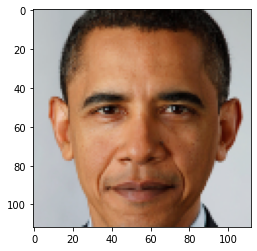

In [4]:
plt.imshow(results['aligned_face'])

Comparar duas imagens faciais e obter o escore de similaridade.

In [5]:
ff.compare("obama.png","obama2.png")

0.8556125

Agregar embeddings de duas imagens faciais em uma única representação

In [6]:
agg = ff.aggregate_from_images(["obama.png","obama2.png"])
agg.shape

(512,)